In [1]:
import numpy as np 
from copy import deepcopy
import matplotlib.pyplot as plt
x = np.array([[1,1]])
y = np.array([[0]])

In [2]:
from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):     
    pre_hidden1 = np.dot(inputs,weights[0])+ weights[1]
    hidden1 = 1/(1+np.exp(-pre_hidden1))
    pre_hidden2 = np.dot(hidden1,weights[2])+ weights[3]
    hidden2 = 1/(1+np.exp(-pre_hidden2))
    out = np.dot(hidden2, weights[4]) + weights[5]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [3]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

In [4]:
W0 = np.random.randn(3, 2)
W1 = np.random.randn(1, 3)
W2 = np.random.randn(3, 3)
W3 = np.random.randn(1, 3)
W4 = np.random.randn(1, 3)
W5 = np.random.randn(1, 1)

print(W0)
print(W1)
print(W2)
print(W3)
print(W4)
print(W5)

[[ 0.41293973 -0.82962032]
 [-0.64223415  1.29338682]
 [ 1.43583959 -0.07424126]]
[[1.13052256 0.46311847 1.68582629]]
[[ 0.51546613  0.33798023 -0.17022367]
 [-0.34759235 -0.03447534 -0.57244228]
 [-0.09787086  0.54041901  0.37491922]]
[[-0.14630209 -0.79406953 -2.30779078]]
[[0.68258935 0.59257512 0.31401305]]
[[-0.77159142]]


In [5]:
W = [
    np.array([[W0[0][0], W0[0][1]],
              [W0[1][0], W0[1][1]],
              [W0[2][0], W0[2][1]]], dtype=np.float32).T, 
    np.array([W1[0][0], W1[0][1], W1[0][2]], dtype=np.float32),
    np.array([[W2[0][0], W2[0][1], W2[0][2]],
              [W2[1][0], W2[1][1], W2[1][2]],
              [W2[2][0], W2[2][1], W2[2][2]]], dtype=np.float32).T,
    np.array([[ W3[0][0], W3[0][1], W3[0][2]]], dtype=np.float32), 
    np.array([W4[0][0], W4[0][1], W4[0][2]], dtype=np.float32).T,
    np.array([W5[0][0]], dtype=np.float32)
]
W

[array([[ 0.41293973, -0.64223415,  1.4358395 ],
        [-0.8296203 ,  1.2933868 , -0.07424127]], dtype=float32),
 array([1.1305226 , 0.46311846, 1.6858263 ], dtype=float32),
 array([[ 0.51546615, -0.34759235, -0.09787086],
        [ 0.33798024, -0.03447534,  0.540419  ],
        [-0.17022367, -0.5724423 ,  0.37491924]], dtype=float32),
 array([[-0.14630209, -0.7940695 , -2.3077908 ]], dtype=float32),
 array([0.68258935, 0.59257513, 0.31401303], dtype=float32),
 array([-0.7715914], dtype=float32)]

Text(0.5, 1.0, 'Loss over increasing number of epochs')

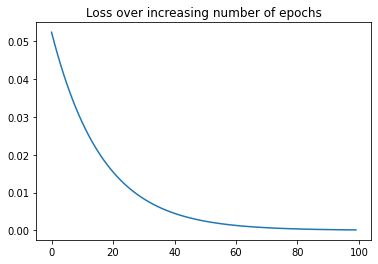

In [6]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [7]:
W

[array([[ 0.41480115, -0.63999933,  1.4354702 ],
        [-0.8277584 ,  1.2956213 , -0.07461047]], dtype=float32),
 array([1.1323845 , 0.46535245, 1.685457  ], dtype=float32),
 array([[ 0.53254133, -0.3393031 , -0.09345081],
        [ 0.35712585, -0.02517706,  0.5453772 ],
        [-0.14596534, -0.56066054,  0.38119897]], dtype=float32),
 array([[-0.12089141, -0.781728  , -2.3012185 ]], dtype=float32),
 array([0.7664694 , 0.61717796, 0.33827105], dtype=float32),
 array([-0.62733454], dtype=float32)]

In [8]:
pre_hidden1 = np.dot(x,W[0]) + W[1]
hidden1 = 1/(1+np.exp(-pre_hidden1))
pre_hidden2 = np.dot(hidden1,W[2]) + W[3]
hidden2 = 1/(1+np.exp(-pre_hidden2))
out = np.dot(hidden2, W[4]) + W[5]

In [9]:
out

array([-0.010354])